In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(
   'Ads_CTR_Optimisation.csv'
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [4]:
import math

In [10]:
n = len(df.columns)
N = 10000
ads_selected = []
no_of_selections = [0] * n
sum_of_rewards = [0] * n
total_reward = 0

for i in range(0, N):
  ad = 0
  max_upper_bound = 0
  for j in range(0,n):
    if (no_of_selections[j] > 0):
      r = sum_of_rewards[j] / no_of_selections[j]
      delta_i = math.sqrt(3/2 * math.log(j+1) / sum_of_rewards[j])
      upper_bound = r + delta_i

    else:
      upper_bound = 1e400

    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = j

    ads_selected.append(ad)
    no_of_selections[ad] += 1
    reward = df.values[i, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

print(total_reward)
print(sum_of_rewards)




<ipython-input-10-58ad867acef8>:14: RuntimeWarning: divide by zero encountered in divide
  delta_i = math.sqrt(3/2 * math.log(j+1) / sum_of_rewards[j])


20557
[4262, 587, 199, 885, 13697, 38, 107, 622, 99, 61]


##above program implements the **Upper Confidence Bound (UCB)** algorithm to solve the Multi-Armed Bandit problem. It selects ads over `N` rounds, balancing exploration (trying new ads) and exploitation (focusing on high-performing ads) to maximize rewards. The code calculates an upper bound for each ad, selects the best one, and updates the selection and reward data iteratively.

Text(0, 0.5, 'Number of times each ad was selected')

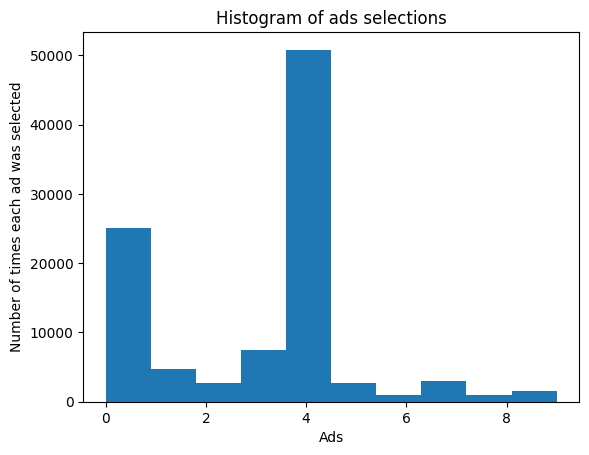

In [14]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')


###name